In [1]:
#Importing necessary libraries

import sys
import numpy as np
import pandas
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.io import ascii
import random
import matplotlib.pyplot as plt
#import healpy

In [4]:
#Open fits images
hdulist = fits.open('../bricks_data/survey-bricks-dr9-south.fits')

In [5]:
hdulist.info()

Filename: ../bricks_data/survey-bricks-dr9-south.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    110   253658R x 51C   [8A, D, D, I, I, I, 6J, 6J, 6J, J, J, J, J, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4I, 4E, E, E, E, E, J, D, D, D, D, D, L, L]   


In [6]:
hdulist[1].columns

ColDefs(
    name = 'brickname'; format = '8A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'nexp_g'; format = 'I'
    name = 'nexp_r'; format = 'I'
    name = 'nexp_z'; format = 'I'
    name = 'nexphist_g'; format = '6J'
    name = 'nexphist_r'; format = '6J'
    name = 'nexphist_z'; format = '6J'
    name = 'nobjs'; format = 'J'
    name = 'npsf'; format = 'J'
    name = 'nsimp'; format = 'J'
    name = 'nrex'; format = 'J'
    name = 'nexp'; format = 'J'
    name = 'ndev'; format = 'J'
    name = 'ncomp'; format = 'J'
    name = 'nser'; format = 'J'
    name = 'ndup'; format = 'J'
    name = 'psfsize_g'; format = 'E'
    name = 'psfsize_r'; format = 'E'
    name = 'psfsize_z'; format = 'E'
    name = 'psfdepth_g'; format = 'E'
    name = 'psfdepth_r'; format = 'E'
    name = 'psfdepth_z'; format = 'E'
    name = 'galdepth_g'; format = 'E'
    name = 'galdepth_r'; format = 'E'
    name = 'galdepth_z'; format = 'E'
    name = 'ebv'; format = 'E'
    name = '

In [7]:
data = hdulist[1].data
brickname = data.field('brickname')
print(brickname)
print("No of objects in data:" , len(brickname))

nexp_g = data.field('nexp_g')
nexp_r = data.field('nexp_r')
nexp_z = data.field('nexp_z')

nexphist_g = data.field('nexphist_g')
print(nexphist_g)

nobjs = data.field('nobjs')
print(nobjs)
print(nobjs.sum())
print(nobjs.mean())

in_desi = data.field('in_desi')
print(in_desi.sum())

['0001m002' '0001m005' '0001m007' ... '3598p337' '3598p340' '3598p342']
No of objects in data: 253658
[[   13721    10684     3049     5047     5451 11768144]
 [    1013      335      192      160      980 11799410]
 [     515      192      271      273     1028 11796945]
 ...
 [  187516  3293297  8293381        0        0        0]
 [ 1031933  6749981  3997104        0        0        0]
 [ 9471026  2292908        0        0        0        0]]
[7986 8746 8422 ... 3867 3505  625]
1649627447
6503.352730842315
167222


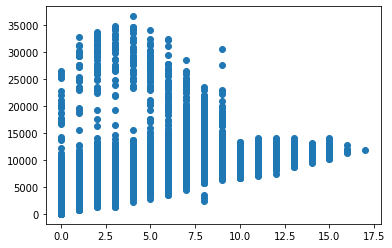

In [8]:
plt.scatter(nexp_g, nobjs)
plt.show()

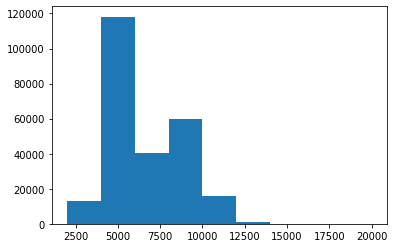

54


In [9]:
plt.hist(nobjs, [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])
plt.show()
print(len(nobjs[nobjs > 30000]))

[0.06249941 0.06249762 0.06249465 ... 0.06236022 0.06238577 0.06230576]


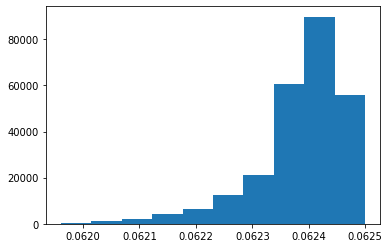

In [10]:
area = data.field('area')
print(area)
plt.hist(area)
plt.show()

In [11]:
psfsize_g = data.field('psfsize_g')
print(psfsize_g)

[1.5324457 1.5129808 1.5433207 ... 2.2195287 2.117054  2.1534765]


## Analysing Distribution of Systematics across Bricks (figure 11 in Kitanidis et Al.)

In [ ]:
hdulistSouth = fits.open('../bricks_data/survey-bricks-dr9-south.fits')
hdulistNorth = fits.open('../bricks_data/survey-bricks-dr9-north.fits')
dataSouth = hdulistSouth[1].data
dataNorth = hdulistNorth[1].data


# EBV = Median SFD98 dust map E(B-V) extinction, in magnitudes, evaluated at BRICK_PRIMARY objects in this brick.

# cosky_g	float32	Estimated sky level in the coadded images (stacks) in -band [1].
# cosky_r	float32	Estimated sky level in the coadded images (stacks) in -band.
# cosky_z	float32	Estimated sky level in the coadded images (stacks) in -band.
